<a href="https://colab.research.google.com/github/sammainahkinya1404/Machine-Learning/blob/main/Data_Science_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP 7150 Assignment 4

Due: March 21, 2023 before midnight.

NAME: _______________

---

**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.

* Answering the question in English: 25%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-25%
    + Not answering the question in English: 0%.
    + Note: An answer is written in English to address a specific question. The answer must come first.  
* Code: 50%
    + Code is correct: 50%
    + Code is correct, but missing some minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
    + Note: code is not an answer. Code shows how you get an answer.  Code comes after an answer.
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%
* Testing: 15%
    + Providing adequate testing of code: 15%
    + Code operational but does not show how the answer(s) were generated: 5%
    + Code not runnable or no testing: 0%


**How to turn in your assignment**

+ Export your notebook to an HTML file.
+ Upload it to the appropriate folder in Assignments on Canvas.

#### Dataset

The dataset you'll used for this assignment is diabetes.csv

The target variable is Outcome. The other 8 variables are features.

This dataset was collected from pregnant women.  Each row corresponds to a person.  An Outcome of 0 means the person is not diagnosed with diabetes.  An Outcome of 1 means the person is diagnosed with diabetes.

**Each problem is worth 20 points.**

In [36]:
import pandas

diabetes = pandas.read_csv('/content/diabetes.csv')

In [37]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

**Problem 1**

Use the approach that is similar to my solution to Problem 8 of the midterm exam, to create a new column called "AgeGroup", which has the following values:

* Group1 - under 25 years old
* Group2 - from 25 to under 30 years old
* Group3 - from 30 to under 40 years old
* Group4 - from 40 to under 50 years old
* Group5 - from 50 years old and up



In [38]:
# Function to map age groups to the new column
def age_Group(Age):
  if Age < 25:
    return 'Group1'
  elif Age >=25 and Age < 30:
    return 'Group2' 
  elif Age >=30 and Age <40:
    return 'Group3'
  elif Age >=40 and Age <50:
    return 'Group4'
  else:
    return 'Group5'
# Creating a new Column AgeGroup
diabetes['AgeGroup']=diabetes['Age'].apply(age_Group)
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,Group5
1,1,85,66,29,0,26.6,0.351,31,0,Group3
2,8,183,64,0,0,23.3,0.672,32,1,Group3
3,1,89,66,23,94,28.1,0.167,21,0,Group1
4,0,137,40,35,168,43.1,2.288,33,1,Group3
5,5,116,74,0,0,25.6,0.201,30,0,Group3
6,3,78,50,32,88,31.0,0.248,26,1,Group2
7,10,115,0,0,0,35.3,0.134,29,0,Group2
8,2,197,70,45,543,30.5,0.158,53,1,Group5
9,8,125,96,0,0,0.0,0.232,54,1,Group5


**Explanation**

This code defines a function called 'age_Group' that takes an input 'Age' and returns a corresponding age group based on the input value. The age groups are defined in the function using a series of conditional statements.

The 'diabetes' dataframe is then updated by creating a new column called 'AgeGroup', which is populated by applying the 'age_Group' function to the 'Age' column. This is done using the 'apply' method, which applies a function to each element in a Pandas series and returns a new series with the results.

The resulting 'diabetes' dataframe has a new column called 'AgeGroup', which contains the corresponding age group for each row based on the 'Age' column. The first 10 rows of the updated dataframe are then displayed using the 'head' method.


---

**Problem 2**

Compare both analytically/numerically and visually the BMI of different age groups, which you created from the previous problem.

In [39]:
# Use Statistical/Numerical method to compare the BMI of different age Groups using Mean(Avarage)
diabetes.groupby('AgeGroup')['BMI'].mean()

AgeGroup
Group1    30.011416
Group2    33.096610
Group3    32.472121
Group4    34.617797
Group5    30.302247
Name: BMI, dtype: float64

<Axes: xlabel='AgeGroup', ylabel='BMI'>

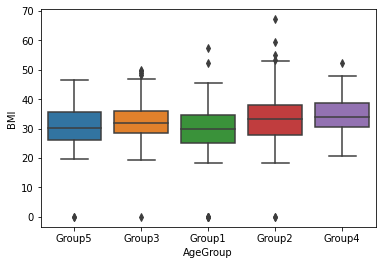

In [40]:
# Using Visualization to compare the BMI of the Age groups
# Box Plot
import seaborn as sns

sns.boxplot(x='AgeGroup',y='BMI', data=diabetes)



<Axes: xlabel='AgeGroup', ylabel='BMI'>

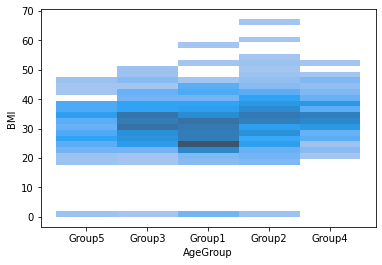

In [41]:
# Histogram
sns.histplot(data=diabetes,x='AgeGroup',y='BMI')

---

**Problem 3**

Create a new column for "BMILevel", which has values: UnderWeight, Healthy, Overweight, Obesity, Class3Obesity, based on the information from this website:

https://www.cdc.gov/obesity/basics/adult-defining.html


In [ ]:
# Requirements
# If your BMI is less than 18.5, it falls within the underweight range.
# If your BMI is 18.5 to <25, it falls within the healthy weight range.
# If your BMI is 25.0 to <30, it falls within the overweight range.
# If your BMI is 30.0 or higher, it falls within the obesity range.
# Obesity is frequently subdivided into categories:

# Class 1: BMI of 30 to < 35
# Class 2: BMI of 35 to < 40
# Class 3: BMI of 40 or higher. Class 3 obesity is sometimes categorized as “severe” obesity.

In [42]:
# Function to Map the  Values to the BMILevel
def map_val(BMI):
  if BMI <18.5:
    return 'UnderWeight'
  elif BMI >= 18.5 and BMI <25:
    return 'Healthy'
  elif BMI >= 25.0 and BMI <30:
    return 'OverWeight'
  elif BMI >=30 and BMI <35:
    return 'Class 1 Obesity'
  elif BMI >= 35 and BMI <40:
    return 'Class 2 Obesity'
  else:
    return 'Class 3 Obesity'
# add a new Column to the  the diabetes dataset 
diabetes['BMILevel']=diabetes['BMI'].apply(map_val)
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMILevel
0,6,148,72,35,0,33.6,0.627,50,1,Group5,Class 1 Obesity
1,1,85,66,29,0,26.6,0.351,31,0,Group3,OverWeight
2,8,183,64,0,0,23.3,0.672,32,1,Group3,Healthy
3,1,89,66,23,94,28.1,0.167,21,0,Group1,OverWeight
4,0,137,40,35,168,43.1,2.288,33,1,Group3,Class 3 Obesity
5,5,116,74,0,0,25.6,0.201,30,0,Group3,OverWeight
6,3,78,50,32,88,31.0,0.248,26,1,Group2,Class 1 Obesity
7,10,115,0,0,0,35.3,0.134,29,0,Group2,Class 2 Obesity
8,2,197,70,45,543,30.5,0.158,53,1,Group5,Class 1 Obesity
9,8,125,96,0,0,0.0,0.232,54,1,Group5,UnderWeight


**Explanation**

This code defines a function called 'map_val' that takes an input 'BMI' and returns a corresponding BMI level based on the input value. The BMI levels are defined in the function using a series of conditional statements.

The 'diabetes' dataframe is then updated by creating a new column called 'BMILevel', which is populated by applying the 'map_val' function to the 'BMI' column. This is done using the 'apply' method, which applies a function to each element in a Pandas series and returns a new series with the results.

The resulting 'diabetes' dataframe has a new column called 'BMILevel', which contains the corresponding BMI level for each row based on the 'BMI' column. The first 10 rows of the updated dataframe are then displayed using the 'head' method.

---
**Problem 4**


Compare both analytically/numerically and visually the Glucose values of different pairs of age groups and BMI levels, which you created from the previous problems.

In [43]:
# Comparing numerically for The BMILevel and Glucose level using Mean(Statistical Mean)
diabetes.groupby('BMILevel')['Glucose'].mean()

BMILevel
Class 1 Obesity    124.366071
Class 2 Obesity    123.326667
Class 3 Obesity    133.897959
Healthy            107.980392
OverWeight         116.346369
UnderWeight        101.866667
Name: Glucose, dtype: float64

<Axes: xlabel='BMILevel', ylabel='Glucose'>

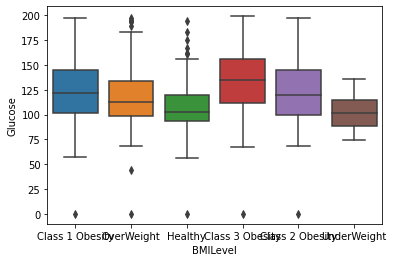

In [44]:
# box plot
sns.boxplot(x='BMILevel',y='Glucose', data=diabetes)

<Axes: xlabel='BMILevel', ylabel='Glucose'>

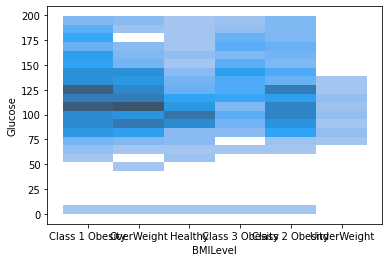

In [45]:
# Histogram
sns.histplot(x='BMILevel',y='Glucose',data=diabetes)

---

**Problem 5**

Create a set of features that will be used for modeling.  These features are:
* Blood pressure
* Insulin
* Age group
* BMI level

Use standard scaling to rescale blood pressure and insulin.

Use the categorical features age group and BMI level into numerical features.



In [46]:
import pandas as pd
# Select the relevant columns from the diabetes dataset for the features you want to include. In this case, you want to include 'BloodPressure', 'Insulin', 'Age', and 'BMILevel':

features = diabetes[['BloodPressure', 'Insulin', 'Age', 'BMILevel']]
# Rescale the 'BloodPressure' and 'Insulin' columns using standard scaling, which involves subtracting the mean and dividing by the standard deviation:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features[['BloodPressure', 'Insulin']] = scaler.fit_transform(features[['BloodPressure', 'Insulin']])
# Convert the categorical features 'Age' and 'BMILevel' into numerical features using one-hot encoding. This will create additional columns for each category in the original columns:

features = pd.get_dummies(features, columns=['Age', 'BMILevel'])
# The resulting 'features' dataframe will contain the rescaled 'BloodPressure' and 'Insulin' columns, as well as the one-hot encoded 'Age' and 'BMILevel' columns. These features can then be used for modeling.

<ipython-input-46-8c70187602f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['BloodPressure', 'Insulin']] = scaler.fit_transform(features[['BloodPressure', 'Insulin']])


**Explanation**

a subset of columns from the 'diabetes' dataset is selected using double square brackets and assigned to a new variable called 'features'. The selected columns are 'BloodPressure', 'Insulin', 'Age', and 'BMILevel'.

Next, the 'StandardScaler' function is imported from the 'sklearn.preprocessing' library. A new 'scaler' object is created using the 'StandardScaler' function, which will be used to rescale the 'BloodPressure' and 'Insulin' columns.

The 'fit_transform' method of the 'scaler' object is used to apply standard scaling to the 'BloodPressure' and 'Insulin' columns in the 'features' dataframe. The resulting rescaled values are then assigned back to the 'BloodPressure' and 'Insulin' columns in the 'features' dataframe.

Finally, the 'get_dummies' function from the Pandas library is used to convert the categorical features 'Age' and 'BMILevel' into numerical features using one-hot encoding. The resulting one-hot encoded columns are added to the 'features' dataframe as additional columns.

The resulting 'features' dataframe contains the rescaled 'BloodPressure' and 'Insulin' columns, as well as the one-hot encoded 'Age' and 'BMILevel' columns. These features can be used for machine learning modeling.




